In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(128,128,3),include_top=False)

In [3]:
print(mobilenet.summary())

Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                         

In [4]:
mobilenet.output

<KerasTensor: shape=(None, 4, 4, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

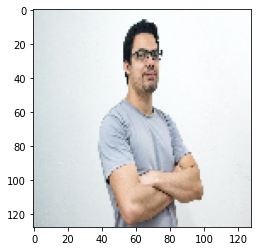

In [5]:
import cv2
img=cv2.imread('man.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=cv2.resize(img,(128,128))
plt.imshow(img)


In [6]:
def fightModel():
    encoder=tf.keras.models.Sequential()
    mobilenet.trainable=False
    inputs=tf.keras.Input(shape=(60,128,128,3))
    encoder.add(mobilenet)
    encoder.add(tf.keras.layers.Flatten())
    
    X=tf.keras.layers.TimeDistributed(encoder)(inputs)
    X = tf.keras.layers.LSTM(30)(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    X = tf.keras.layers.Dense(128,activation='relu')(X)
    X = tf.keras.layers.Dropout(0.1)(X)
    outputs = tf.keras.layers.Dense(1,activation='sigmoid')(X)
    model=tf.keras.Model(inputs=inputs,outputs=outputs)

    # model.add(tf.keras.layers.LSTM(30))
    # model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Dense(128,activation='relu'))
    # model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [7]:
model=fightModel()

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 128, 128, 3)  0         
                             ]                                   
                                                                 
 time_distributed (TimeDistr  (None, 60, 16384)        3228864   
 ibuted)                                                         
                                                                 
 lstm (LSTM)                 (None, 30)                1969800   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

In [9]:
model.save('model.h5')